This project aims to analyze coup events across various countries and then use socioeconomic indicators to predict a future coup attempt. The first dataset includes information about coups, including the date, type of event (coup, attempted, conspiracy), and various outcomes (e.g., realized, unrealized, injuries, deaths). The second dataset includes socioeconomic information about countries including GDP, HDI, Population, Birthrate, GDP(PPP), and etc.

### Motivation
Understanding the patterns and causes of coup events can help in analyzing political stability and the factors contributing to future coup attempts. Being able to predict future attempts can help improve political stability. 

### Questions
1. Which countries have experienced the most coup events?
2. How do the types of coup events vary across different countries and time periods?
3. Which socioeconmic indicators can cause and predict future coup events? 
4. Which model can best predict future coup attempts?

---
title: "Background"
description: "Motivation of the research"
author: "Joseph Shiller"
date: "August 2 2024"
date-modified: "August 2 2024"

---

### Background

Coups are sudden and often violent takeovers of a government by a small group, usually involving the military. They have been common in many regions, especially in Africa, Latin America, and parts of Asia. Coups can drastically change the political situation in a country and often have negative effects on political stability, economic growth, freedom and safety

#### Negative Impacts of Coups

1. **Political Instability**:
   - Coups create a period of uncertainty and instability. They disrupt normal political processes and can lead to power struggles. This instability can make people lose trust in their government.

2. **Economic Decline**:
   - The economy usually suffers after a coup. Investors lose confidence, leading to less investment and economic growth. Countries may face sanctions from other nations, making economic recovery even harder.

3. **Social Unrest**:
   - Coups often lead to protests and violence. Governments may impose strict measures like curfews, which can increase tensions among the population.

4. **Human Rights Violations**:
   - After a coup, human rights abuses often increase. Political opponents, activists, and journalists can be targeted, leading to arrests, torture, and sometimes killings. With democratic processes suspended, there are fewer checks on power, allowing abuses to continue.

#### Importance of Predicting Future Coups

1. **Preventative Measures**:
   - Predicting future coups can help governments and international organizations take steps to prevent them. This might include diplomatic actions, economic aid, or support for democratic institutions to address instability.

2. **Resource Allocation**:
   - Prediction models can help direct resources to areas most at risk of coups. Governments and NGOs can focus their efforts where they are most needed, ensuring better use of resources.

3. **Stability and Development**:
   - Political stability is key for development. Predicting and preventing coups can help maintain a stable environment for economic growth and development. Stability allows for long-term planning and better policies for improving people's lives.

4. **Global Security**:
   - Instability in one country can affect global security. Predicting coups can help prevent regional conflicts, mass migrations, and the spread of extremist ideologies. A stable world is safer and more prosperous for everyone.


Understanding and predicting coups is important for maintaining political stability, economic growth, and safety in countries. Coups have severe negative impacts, including political instability, economic decline, social unrest, and human rights violations. By predicting future coups, policymakers and international organizations can take steps to prevent them, allocate resources efficiently, and promote stability and development. This proactive approach benefits both the countries at risk and contributes to global security and prosperity.

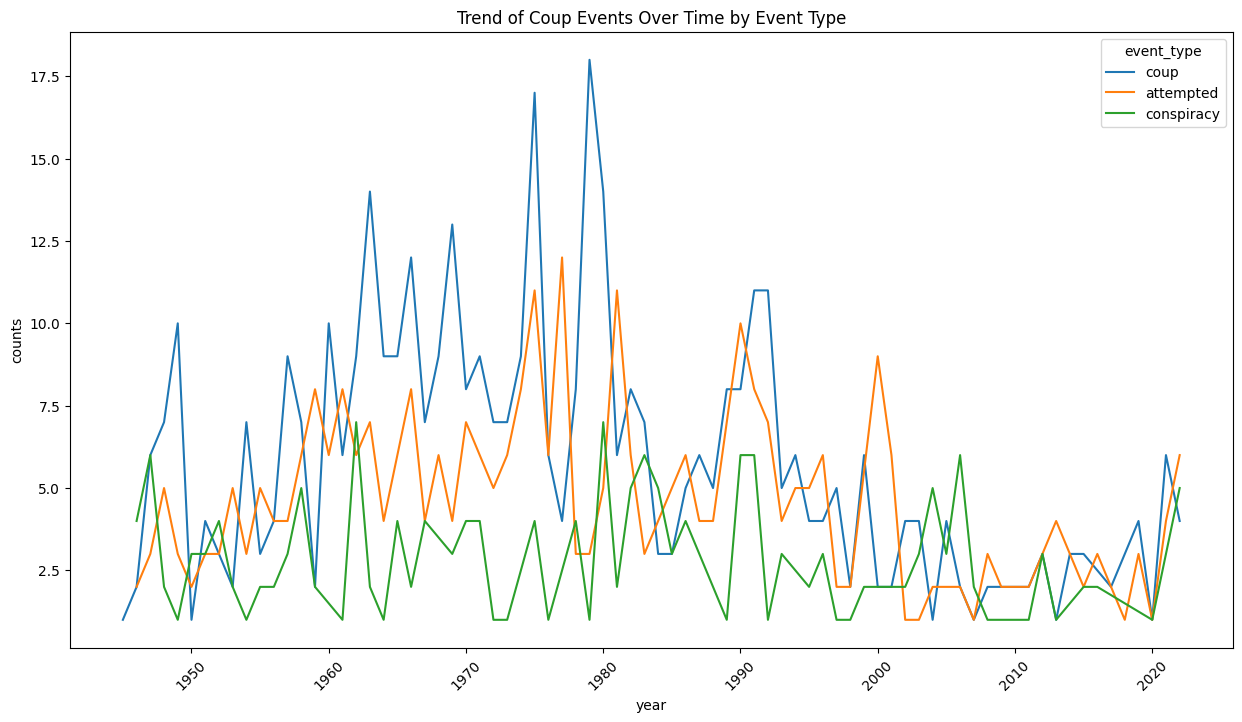

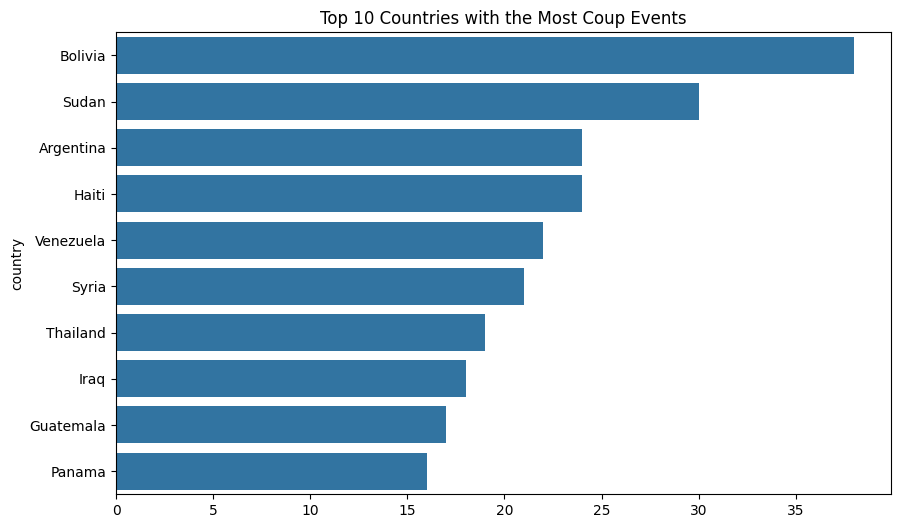

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/home/jovyan/DH140-Final-Project/Coup data.csv')
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])



# 2. Trend of coup events over time by event type
plt.figure(figsize=(15, 8))
data['year'] = data['date'].dt.year
event_type_counts = data.groupby(['year', 'event_type']).size().reset_index(name='counts')
sns.lineplot(x='year', y='counts', hue='event_type', data=event_type_counts)
plt.title('Trend of Coup Events Over Time by Event Type')
plt.xticks(rotation=45)
plt.show()


# 4. Top 10 countries with the most coup events
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Coup Events')
plt.show()

## Analysis of Coup Events and Political Instability ##

The analysis of coup events over time and across different countries reveals significant insights into political instability, particularly in developing, highly authoritarian, and war-torn countries. These regions tend to experience frequent coups, which contribute to severe political instability and have detrimental effects on their populations.

### Trends of Coup Events Over Time ###

The trend of coup events over time, categorized by event type (coup, attempted, conspiracy), shows that these incidents have been highly variable and unpredictable. Periods of intense coup activity are followed by relative calm, reflecting the instability inherent in these regions. This variability makes it challenging to anticipate future coups without advanced predictive models.

The top 10 countries with the most coup events are Bolivia, Sudan, Argentina, Haiti, Venezuela, Syria, Thailand, Iraq, Guatemala, and Panama. These countries share common characteristics:

- Developing Economies: Many of these countries are developing nations with fragile economies. Economic hardships and lack of opportunities can lead to dissatisfaction and unrest, providing fertile ground for coups.
- Authoritarian Regimes: Authoritarian governments, often marked by lack of political freedoms and human rights abuses, face frequent coup attempts as different factions vie for power.
- Conflict Zones: Countries like Syria and Iraq, which have experienced prolonged conflict and war, are more susceptible to coups due to the breakdown of traditional governance structures and the presence of armed groups.

### Negative Impacts on Populations ###

Coups and political instability have severe negative impacts on the people living in these countries:

- Economic Decline: Frequent coups disrupt economic activities, lead to capital flight, and deter foreign investment, resulting in economic decline and poverty.
- Social Unrest: The instability following coups often leads to increased violence, protests, and social unrest, further destabilizing the country.
- Human Rights Violations: Authoritarian regimes and coup leaders often resort to repression, leading to widespread human rights abuses, including arrests, torture, and extrajudicial killings.


The data clearly shows that developing, authoritarian, and conflict-ridden countries are more prone to frequent coups and political instability. This instability has far-reaching negative impacts on the economic, social, and human rights conditions of the affected populations. Understanding these patterns and predicting future coups is crucial for implementing measures to enhance political stability and improve the quality of life in these regions.